In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Warning
import warnings
warnings.filterwarnings('ignore')



# Data Collection 

In [2]:
#Reading CSUSHPISA Data into a dataframe
CSUSHPISA_df = pd.read_csv(r'C:\Users\THE ITPRO\Downloads\CSUSHPISA (1).csv')
print(CSUSHPISA_df.shape)
CSUSHPISA_df.head()


(241, 2)


,DATE,CSUSHPISA
0,01-01-2003,128.461
1,01-02-2003,129.355
2,01-03-2003,130.148
3,01-04-2003,130.884
4,01-05-2003,131.735


In [3]:
#Reading Per Capita GDP Data into a dataframe
#The data is quarterly. I will impute for other months using linear interpolation
Percap_gdp_df = pd.read_csv(r'C:\Users\THE ITPRO\Downloads\Per_Capita_GDP.csv',names = ["DATE", "Per_Capita_GDP"], skiprows = 1)
print(Percap_gdp_df.shape)
Percap_gdp_df.head()

(81, 2)


,DATE,Per_Capita_GDP
0,01-01-2003,50462
1,01-04-2003,50796
2,01-07-2003,51512
3,01-10-2003,51986
4,01-01-2004,52179


In [4]:
#Reading Unemployment Rate Data into a dataframe
unemp_df = pd.read_csv(r'C:\Users\THE ITPRO\Downloads\UNRATE.csv')
print(unemp_df.shape)
unemp_df.head()

(241, 2)


,DATE,UNRATE
0,01-01-2003,5.8
1,01-02-2003,5.9
2,01-03-2003,5.9
3,01-04-2003,6.0
4,01-05-2003,6.1


In [5]:
# Reading Construction Materials into a dataframe
cons_price_df= pd.read_csv(r'C:\Users\THE ITPRO\Downloads\Cons_Materials.csv')
print(cons_price_df.shape)
cons_price_df.head()

(241, 2)


,DATE,Cons_Materials
0,01-01-2003,144.4
1,01-02-2003,145.2
2,01-03-2003,145.2
3,01-04-2003,145.9
4,01-05-2003,145.8


In [6]:
# Reading Permit(Owned Housing) into a dataframe
PERMIT_df = pd.read_csv(r'C:\Users\THE ITPRO\Downloads\PERMIT.csv')
PERMIT_df.shape
PERMIT_df.head()

,DATE,PERMIT
0,01-01-2003,1808
1,01-02-2003,1854
2,01-03-2003,1757
3,01-04-2003,1803
4,01-05-2003,1835


In [7]:
#Reading dataset of EMPLOYMENT RATIO into a dataframe
Empl_Ratio_df = pd.read_csv(r'C:\Users\THE ITPRO\Downloads\EMRATIO.csv')
print(Empl_Ratio_df.shape)
Empl_Ratio_df.head()

(241, 2)


,DATE,EMRATIO
0,01-01-2003,62.5
1,01-02-2003,62.5
2,01-03-2003,62.4
3,01-04-2003,62.4
4,01-05-2003,62.3


In [8]:
#Reading dataset of FEDFUNDS into a dataframe
df_fedfunds = pd.read_csv(r'C:\Users\THE ITPRO\Downloads\FEDFUNDS.csv')
print(df_fedfunds.shape)
df_fedfunds.head()

(241, 2)


,DATE,FEDFUNDS
0,01-01-2003,1.24
1,01-02-2003,1.26
2,01-03-2003,1.25
3,01-04-2003,1.26
4,01-05-2003,1.26


In [9]:
# Reading monthly new house supply into a dataframe
df_house = pd.read_csv(r'C:\Users\THE ITPRO\Downloads\New_house_supply.csv')
print(df_house.shape)
df_house.head()

(241, 2)


,DATE,New_House
0,01-01-2003,4.0
1,01-02-2003,4.5
2,01-03-2003,4.1
3,01-04-2003,4.1
4,01-05-2003,3.9


In [10]:
# Reading dataset Income into a dataframe
df_income = pd.read_csv(r'C:\Users\THE ITPRO\Downloads\income.csv')
print(df_income.shape)
df_income.tail()

(241, 2)


,DATE,income
236,01-09-2022,16184.9
237,01-10-2022,16223.5
238,01-11-2022,16229.6
239,01-12-2022,16265.1
240,01-01-2023,16601.9


In [11]:
# Reading dataset Number of households into a dataframe
df_households = pd.read_csv(r'C:\Users\THE ITPRO\Downloads\total_income.csv')
print(df_households.shape)
df_households.head()

(241, 2)


,DATE,TTLHHM156N
0,01-01-2003,105513.0
1,01-02-2003,105432.0
2,01-03-2003,105277.0
3,01-04-2003,105470.0
4,01-05-2003,105507.0


# Data Preparation

In [12]:
# Merging two data 
df1 = pd.merge(CSUSHPISA_df,unemp_df, how = 'left')
df1

,DATE,CSUSHPISA,UNRATE
0,01-01-2003,128.461,5.8
1,01-02-2003,129.355,5.9
2,01-03-2003,130.148,5.9
3,01-04-2003,130.884,6.0
4,01-05-2003,131.735,6.1
...,...,...,...
236,01-09-2022,299.353,3.5
237,01-10-2022,298.873,3.7
238,01-11-2022,298.269,3.6
239,01-12-2022,297.413,3.5


In [13]:
df1 = pd.merge(df1,cons_price_df, how = 'left')
df1

,DATE,CSUSHPISA,UNRATE,Cons_Materials
0,01-01-2003,128.461,5.8,144.400
1,01-02-2003,129.355,5.9,145.200
2,01-03-2003,130.148,5.9,145.200
3,01-04-2003,130.884,6.0,145.900
4,01-05-2003,131.735,6.1,145.800
...,...,...,...,...
236,01-09-2022,299.353,3.5,336.464
237,01-10-2022,298.873,3.7,333.796
238,01-11-2022,298.269,3.6,330.369
239,01-12-2022,297.413,3.5,326.449


In [14]:
df1 = pd.merge(df1,PERMIT_df, how = 'left' )
df1

,DATE,CSUSHPISA,UNRATE,Cons_Materials,PERMIT
0,01-01-2003,128.461,5.8,144.400,1808
1,01-02-2003,129.355,5.9,145.200,1854
2,01-03-2003,130.148,5.9,145.200,1757
3,01-04-2003,130.884,6.0,145.900,1803
4,01-05-2003,131.735,6.1,145.800,1835
...,...,...,...,...,...
236,01-09-2022,299.353,3.5,336.464,1588
237,01-10-2022,298.873,3.7,333.796,1555
238,01-11-2022,298.269,3.6,330.369,1402
239,01-12-2022,297.413,3.5,326.449,1409


In [15]:
df1 = pd.merge(df1, Empl_Ratio_df, how = 'left')
df1

,DATE,CSUSHPISA,UNRATE,Cons_Materials,PERMIT,EMRATIO
0,01-01-2003,128.461,5.8,144.400,1808,62.5
1,01-02-2003,129.355,5.9,145.200,1854,62.5
2,01-03-2003,130.148,5.9,145.200,1757,62.4
3,01-04-2003,130.884,6.0,145.900,1803,62.4
4,01-05-2003,131.735,6.1,145.800,1835,62.3
...,...,...,...,...,...,...
236,01-09-2022,299.353,3.5,336.464,1588,60.1
237,01-10-2022,298.873,3.7,333.796,1555,60.0
238,01-11-2022,298.269,3.6,330.369,1402,59.9
239,01-12-2022,297.413,3.5,326.449,1409,60.1


In [16]:
df1 = pd.merge(df1,df_house, how = 'left')
df1

,DATE,CSUSHPISA,UNRATE,Cons_Materials,PERMIT,EMRATIO,New_House
0,01-01-2003,128.461,5.8,144.400,1808,62.5,4.0
1,01-02-2003,129.355,5.9,145.200,1854,62.5,4.5
2,01-03-2003,130.148,5.9,145.200,1757,62.4,4.1
3,01-04-2003,130.884,6.0,145.900,1803,62.4,4.1
4,01-05-2003,131.735,6.1,145.800,1835,62.3,3.9
...,...,...,...,...,...,...,...
236,01-09-2022,299.353,3.5,336.464,1588,60.1,9.7
237,01-10-2022,298.873,3.7,333.796,1555,60.0,9.7
238,01-11-2022,298.269,3.6,330.369,1402,59.9,9.4
239,01-12-2022,297.413,3.5,326.449,1409,60.1,8.5


In [17]:
df1 = pd.merge(df1,df_households, how = 'left')
df1

,DATE,CSUSHPISA,UNRATE,Cons_Materials,PERMIT,EMRATIO,New_House,TTLHHM156N
0,01-01-2003,128.461,5.8,144.400,1808,62.5,4.0,105513.0
1,01-02-2003,129.355,5.9,145.200,1854,62.5,4.5,105432.0
2,01-03-2003,130.148,5.9,145.200,1757,62.4,4.1,105277.0
3,01-04-2003,130.884,6.0,145.900,1803,62.4,4.1,105470.0
4,01-05-2003,131.735,6.1,145.800,1835,62.3,3.9,105507.0
...,...,...,...,...,...,...,...,...
236,01-09-2022,299.353,3.5,336.464,1588,60.1,9.7,128667.0
237,01-10-2022,298.873,3.7,333.796,1555,60.0,9.7,129236.0
238,01-11-2022,298.269,3.6,330.369,1402,59.9,9.4,129341.0
239,01-12-2022,297.413,3.5,326.449,1409,60.1,8.5,129612.0


In [18]:
# Merging Per Capita GDP with all columns
df1 = pd.merge(df1,Percap_gdp_df, how = "left")
df1

,DATE,CSUSHPISA,UNRATE,Cons_Materials,PERMIT,EMRATIO,New_House,TTLHHM156N,Per_Capita_GDP
0,01-01-2003,128.461,5.8,144.400,1808,62.5,4.0,105513.0,50462.0
1,01-02-2003,129.355,5.9,145.200,1854,62.5,4.5,105432.0,NaN
2,01-03-2003,130.148,5.9,145.200,1757,62.4,4.1,105277.0,NaN
3,01-04-2003,130.884,6.0,145.900,1803,62.4,4.1,105470.0,50796.0
4,01-05-2003,131.735,6.1,145.800,1835,62.3,3.9,105507.0,NaN
...,...,...,...,...,...,...,...,...,...
236,01-09-2022,299.353,3.5,336.464,1588,60.1,9.7,128667.0,NaN
237,01-10-2022,298.873,3.7,333.796,1555,60.0,9.7,129236.0,65783.0
238,01-11-2022,298.269,3.6,330.369,1402,59.9,9.4,129341.0,NaN
239,01-12-2022,297.413,3.5,326.449,1409,60.1,8.5,129612.0,NaN


In [19]:
df1 = pd.merge(df1,df_fedfunds, how = 'left')
df1

,DATE,CSUSHPISA,UNRATE,Cons_Materials,PERMIT,EMRATIO,New_House,TTLHHM156N,Per_Capita_GDP,FEDFUNDS
0,01-01-2003,128.461,5.8,144.400,1808,62.5,4.0,105513.0,50462.0,1.24
1,01-02-2003,129.355,5.9,145.200,1854,62.5,4.5,105432.0,NaN,1.26
2,01-03-2003,130.148,5.9,145.200,1757,62.4,4.1,105277.0,NaN,1.25
3,01-04-2003,130.884,6.0,145.900,1803,62.4,4.1,105470.0,50796.0,1.26
4,01-05-2003,131.735,6.1,145.800,1835,62.3,3.9,105507.0,NaN,1.26
...,...,...,...,...,...,...,...,...,...,...
236,01-09-2022,299.353,3.5,336.464,1588,60.1,9.7,128667.0,NaN,2.56
237,01-10-2022,298.873,3.7,333.796,1555,60.0,9.7,129236.0,65783.0,3.08
238,01-11-2022,298.269,3.6,330.369,1402,59.9,9.4,129341.0,NaN,3.78
239,01-12-2022,297.413,3.5,326.449,1409,60.1,8.5,129612.0,NaN,4.10


In [20]:
df1 = pd.merge(df1,df_income,how = 'left')
df1

,DATE,CSUSHPISA,UNRATE,Cons_Materials,PERMIT,EMRATIO,New_House,TTLHHM156N,Per_Capita_GDP,FEDFUNDS,income
0,01-01-2003,128.461,5.8,144.400,1808,62.5,4.0,105513.0,50462.0,1.24,10710.4
1,01-02-2003,129.355,5.9,145.200,1854,62.5,4.5,105432.0,NaN,1.26,10674.0
2,01-03-2003,130.148,5.9,145.200,1757,62.4,4.1,105277.0,NaN,1.25,10696.5
3,01-04-2003,130.884,6.0,145.900,1803,62.4,4.1,105470.0,50796.0,1.26,10752.7
4,01-05-2003,131.735,6.1,145.800,1835,62.3,3.9,105507.0,NaN,1.26,10832.0
...,...,...,...,...,...,...,...,...,...,...,...
236,01-09-2022,299.353,3.5,336.464,1588,60.1,9.7,128667.0,NaN,2.56,16184.9
237,01-10-2022,298.873,3.7,333.796,1555,60.0,9.7,129236.0,65783.0,3.08,16223.5
238,01-11-2022,298.269,3.6,330.369,1402,59.9,9.4,129341.0,NaN,3.78,16229.6
239,01-12-2022,297.413,3.5,326.449,1409,60.1,8.5,129612.0,NaN,4.10,16265.1


In [21]:
df1.isna().sum()

DATE                0
CSUSHPISA           0
UNRATE              0
Cons_Materials      0
PERMIT              0
EMRATIO             0
New_House           0
TTLHHM156N          0
Per_Capita_GDP    160
FEDFUNDS            0
income              0
dtype: int64

In [22]:
#fill the missing values of per_capita_gdp column using linear interpolation as it is in quaterly.
df1["Per_Capita_GDP"] = df1["Per_Capita_GDP"].interpolate()
df1


,DATE,CSUSHPISA,UNRATE,Cons_Materials,PERMIT,EMRATIO,New_House,TTLHHM156N,Per_Capita_GDP,FEDFUNDS,income
0,01-01-2003,128.461,5.8,144.400,1808,62.5,4.0,105513.0,50462.000000,1.24,10710.4
1,01-02-2003,129.355,5.9,145.200,1854,62.5,4.5,105432.0,50573.333333,1.26,10674.0
2,01-03-2003,130.148,5.9,145.200,1757,62.4,4.1,105277.0,50684.666667,1.25,10696.5
3,01-04-2003,130.884,6.0,145.900,1803,62.4,4.1,105470.0,50796.000000,1.26,10752.7
4,01-05-2003,131.735,6.1,145.800,1835,62.3,3.9,105507.0,51034.666667,1.26,10832.0
...,...,...,...,...,...,...,...,...,...,...,...
236,01-09-2022,299.353,3.5,336.464,1588,60.1,9.7,128667.0,65676.000000,2.56,16184.9
237,01-10-2022,298.873,3.7,333.796,1555,60.0,9.7,129236.0,65783.000000,3.08,16223.5
238,01-11-2022,298.269,3.6,330.369,1402,59.9,9.4,129341.0,65881.333333,3.78,16229.6
239,01-12-2022,297.413,3.5,326.449,1409,60.1,8.5,129612.0,65979.666667,4.10,16265.1


In [23]:
df1.isna().sum()

DATE              0
CSUSHPISA         0
UNRATE            0
Cons_Materials    0
PERMIT            0
EMRATIO           0
New_House         0
TTLHHM156N        0
Per_Capita_GDP    0
FEDFUNDS          0
income            0
dtype: int64

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            241 non-null    object 
 1   CSUSHPISA       241 non-null    float64
 2   UNRATE          241 non-null    float64
 3   Cons_Materials  241 non-null    float64
 4   PERMIT          241 non-null    int64  
 5   EMRATIO         241 non-null    float64
 6   New_House       241 non-null    float64
 7   TTLHHM156N      241 non-null    float64
 8   Per_Capita_GDP  241 non-null    float64
 9   FEDFUNDS        241 non-null    float64
 10  income          241 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 20.8+ KB


# Exploratory Data Analysis (EDA):

In [25]:
df1.describe()
     

,CSUSHPISA,UNRATE,Cons_Materials,PERMIT,EMRATIO,New_House,TTLHHM156N,Per_Capita_GDP,FEDFUNDS,income
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,181.140112,6.001245,213.326515,1309.535270,60.172614,6.146058,115700.108299,57423.390041,1.314191,13506.378838
std,41.845072,2.036837,45.081070,478.888896,1.942335,1.952241,6610.904261,4009.009732,1.587253,1844.553154
min,128.461000,3.400000,144.400000,513.000000,51.300000,3.300000,105277.000000,50462.000000,0.050000,10674.000000
25%,148.134000,4.500000,184.300000,980.000000,58.700000,4.800000,110875.000000,54457.000000,0.120000,12120.500000
50%,172.860000,5.400000,208.300000,1291.000000,59.900000,5.600000,114714.000000,55859.000000,0.400000,12999.800000
75%,198.315000,7.300000,225.800000,1680.000000,62.200000,7.200000,120210.000000,60482.333333,2.000000,14886.600000
max,304.724000,14.700000,353.015000,2263.000000,63.400000,12.200000,129612.000000,66078.000000,5.260000,20422.600000


<Figure size 1200x600 with 0 Axes>

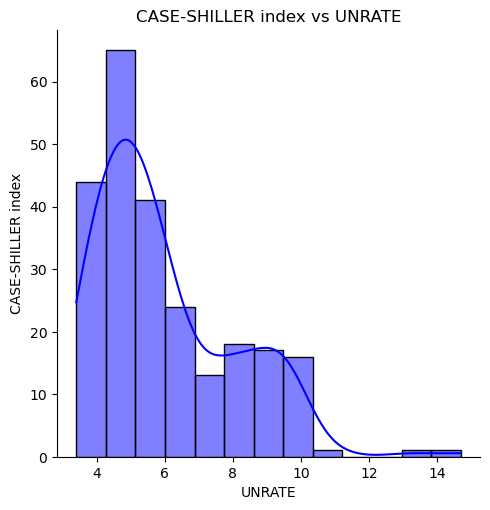

In [26]:
# Plotting displot plots of the CASE-SHILLER index vs features
plt.figure(figsize=(12, 6))
sns.displot(data=df1, x=df1['UNRATE'], kde =True, color ='blue')
plt.xlabel('UNRATE')
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs {'UNRATE'}")
plt.show()

<Figure size 1200x600 with 0 Axes>

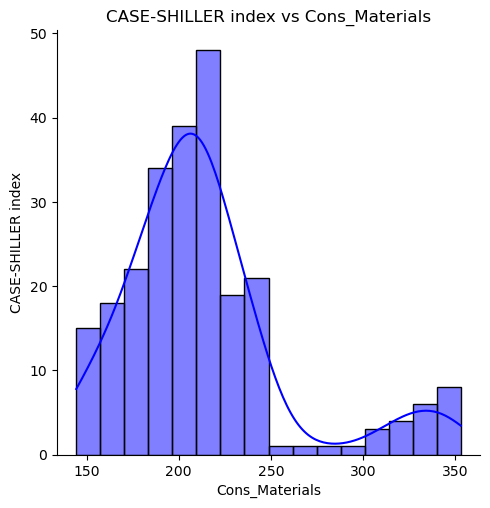

In [27]:
plt.figure(figsize=(12, 6))
sns.displot(data=df1, x=df1['Cons_Materials'], kde =True, color ='blue')
plt.xlabel('Cons_Materials')
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs {'Cons_Materials'}")
plt.show()

<Figure size 1200x600 with 0 Axes>

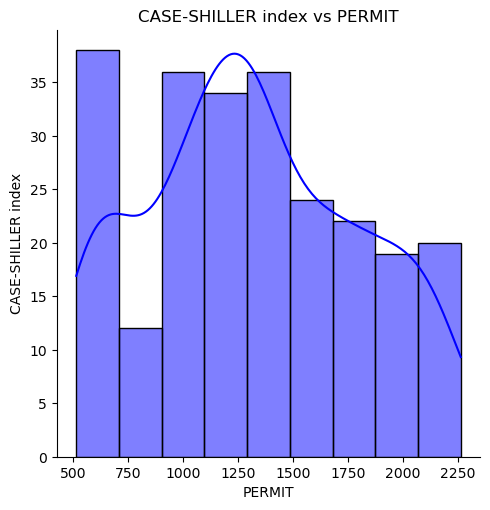

In [28]:
plt.figure(figsize=(12, 6))
sns.displot(data=df1, x=df1['PERMIT'], kde =True, color ='blue')
plt.xlabel('PERMIT')
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs {'PERMIT'}")
plt.show()

<Figure size 1200x600 with 0 Axes>

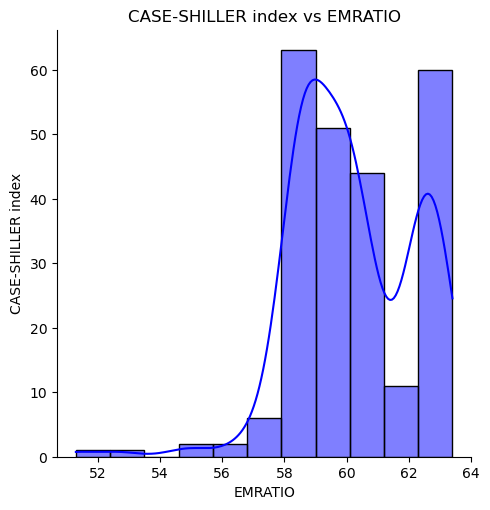

In [29]:
plt.figure(figsize=(12, 6))
sns.displot(data=df1, x=df1['EMRATIO'], kde =True, color ='blue')
plt.xlabel('EMRATIO')
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs {'EMRATIO'}")
plt.show()

<Figure size 1200x600 with 0 Axes>

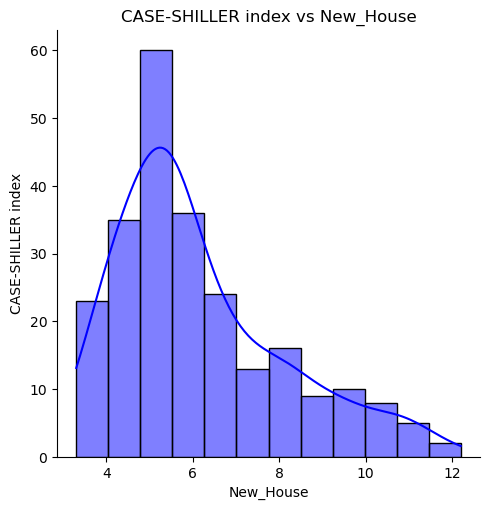

In [30]:
plt.figure(figsize=(12, 6))
sns.displot(data=df1, x=df1['New_House'], kde =True, color ='blue')
plt.xlabel('New_House')
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs {'New_House'}")
plt.show()

<Figure size 1200x600 with 0 Axes>

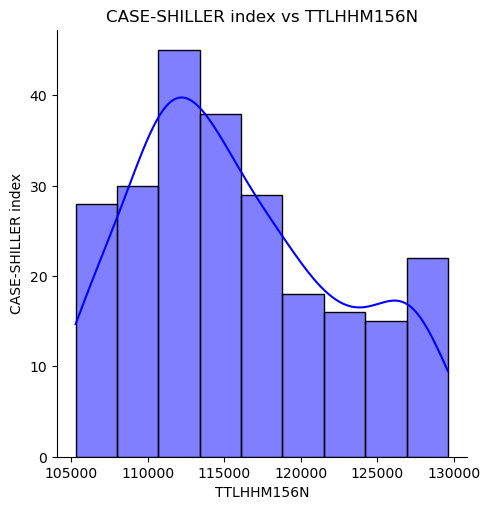

In [31]:
plt.figure(figsize=(12, 6))
sns.displot(data=df1, x=df1['TTLHHM156N'], kde =True, color ='blue')
plt.xlabel('TTLHHM156N')
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs {'TTLHHM156N'}")
plt.show()

<Figure size 1200x600 with 0 Axes>

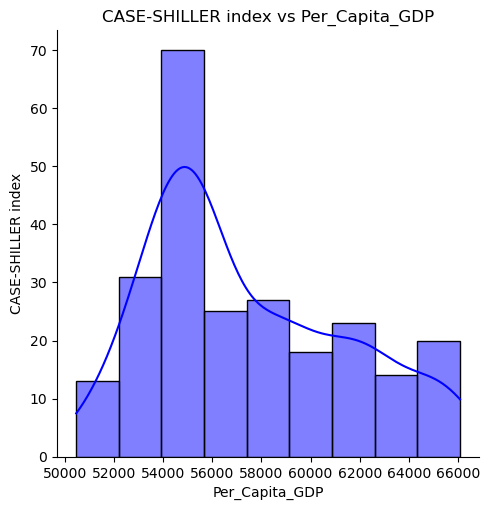

In [32]:
plt.figure(figsize=(12, 6))
sns.displot(data=df1, x=df1['Per_Capita_GDP'], kde =True, color ='blue')
plt.xlabel('Per_Capita_GDP')
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs {'Per_Capita_GDP'}")
plt.show()

<Figure size 1200x600 with 0 Axes>

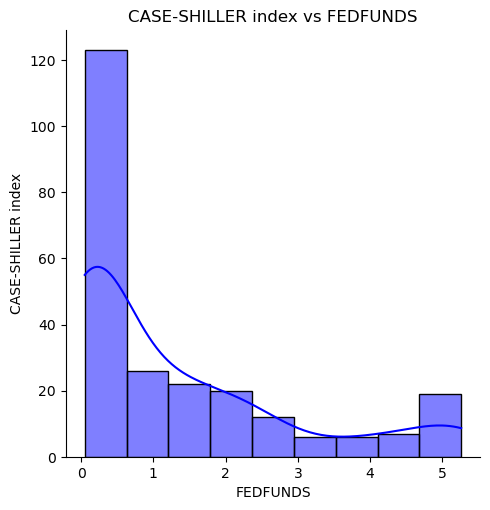

In [33]:
plt.figure(figsize=(12, 6))
sns.displot(data=df1, x=df1['FEDFUNDS'], kde =True, color ='blue')
plt.xlabel('FEDFUNDS')
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs {'FEDFUNDS'}")
plt.show()

<Figure size 1200x600 with 0 Axes>

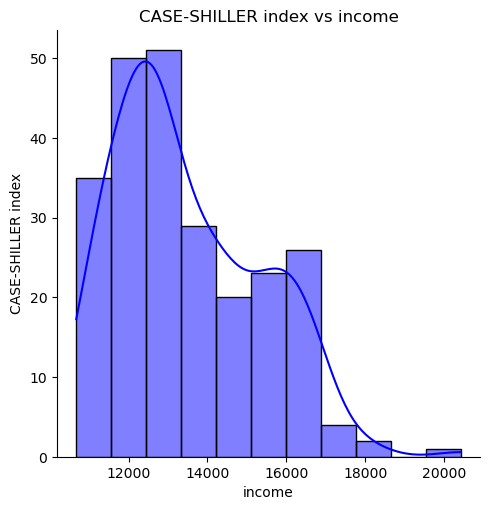

In [34]:
plt.figure(figsize=(12, 6))
sns.displot(data=df1, x=df1['income'], kde =True, color ='blue')
plt.xlabel('income')
plt.ylabel("CASE-SHILLER index")
plt.title(f"CASE-SHILLER index vs {'income'}")
plt.show()

# Model Evaluation:

In [43]:
df1.drop(columns=['DATE'],inplace = True)
df1

,CSUSHPISA,UNRATE,Cons_Materials,PERMIT,EMRATIO,New_House,TTLHHM156N,Per_Capita_GDP,FEDFUNDS,income
0,128.461,5.8,144.400,1808,62.5,4.0,105513.0,50462.000000,1.24,10710.4
1,129.355,5.9,145.200,1854,62.5,4.5,105432.0,50573.333333,1.26,10674.0
2,130.148,5.9,145.200,1757,62.4,4.1,105277.0,50684.666667,1.25,10696.5
3,130.884,6.0,145.900,1803,62.4,4.1,105470.0,50796.000000,1.26,10752.7
4,131.735,6.1,145.800,1835,62.3,3.9,105507.0,51034.666667,1.26,10832.0
...,...,...,...,...,...,...,...,...,...,...
236,299.353,3.5,336.464,1588,60.1,9.7,128667.0,65676.000000,2.56,16184.9
237,298.873,3.7,333.796,1555,60.0,9.7,129236.0,65783.000000,3.08,16223.5
238,298.269,3.6,330.369,1402,59.9,9.4,129341.0,65881.333333,3.78,16229.6
239,297.413,3.5,326.449,1409,60.1,8.5,129612.0,65979.666667,4.10,16265.1


In [44]:
X = df1.drop(columns=['CSUSHPISA'], axis=1)
y = df1['CSUSHPISA']
     

In [45]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [46]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

# Model Building

In [47]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)


In [48]:
# R squared error
score = r2_score(pred, y_test)
print("The r2_score for the test set is: ", score)

The r2_score for the test set is:  0.9894645020304034


In [49]:
#XGBoost Regressor

In [50]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [51]:
from xgboost import XGBRegressor

In [52]:
model = XGBRegressor()

In [53]:
#training the model with X_train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [55]:
print(training_data_prediction)

[142.27888 215.86565 239.55983 161.93272 147.38309 178.1148  145.85187
 180.08588 193.7578  172.12787 285.92435 174.79723 140.35292 165.89272
 205.66553 160.31145 145.50931 158.32152 173.82007 206.53767 138.67049
 136.54396 303.88007 148.27817 171.18909 146.82492 141.67009 194.8013
 132.65128 177.5575  152.84991 169.8032  270.37845 165.01726 185.7283
 214.99309 168.04599 174.44221 141.64517 180.90475 169.35223 183.0746
 139.8767  154.18784 180.82785 183.0002  142.0543  164.56921 229.74815
 147.69232 183.50761 207.51462 170.29718 148.4064  167.3351  165.81853
 303.76096 178.15518 198.30711 183.74673 128.464   130.14784 148.09076
 183.61292 139.9018  300.57098 296.44708 189.6153  144.99255 145.64514
 186.79393 178.75562 139.97649 182.32458 166.65291 171.54218 157.52838
 144.57991 177.29123 163.66714 140.18015 301.4664  167.49963 170.86523
 131.73357 149.96362 176.4381  165.2273  209.27826 170.05417 163.39432
 158.22923 242.3706  199.2304  156.14868 201.42465 166.65509 182.79774
 176.5400

In [56]:
# R squared error
score_1 = r2_score(y_train, training_data_prediction )

print("R squared error:", score_1)


R squared error: 0.999999982566677


<function matplotlib.pyplot.show(close=None, block=None)>

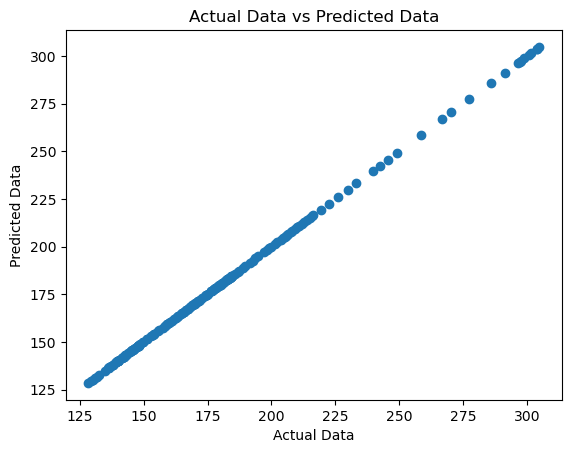

In [57]:
#visualization the actual data and predicted data
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Actual Data vs Predicted Data")
plt.show

In [58]:
#accuracy for prediction on test data
testing_data_prediction = model.predict(X_test)

In [59]:
print(testing_data_prediction)

[166.8047  133.36838 253.2316  221.20036 299.10336 191.2996  207.92975
 245.99739 138.95581 137.461   183.8999  230.93625 273.6545  219.18214
 147.77481 166.86412 200.87091 145.07465 161.73125 160.14095 174.81233
 154.25124 136.90471 172.56903 199.98315 187.3443  141.6178  148.68335
 142.63266 173.38908 138.44037 234.89868 158.22467 173.61902 152.00418
 154.13628 142.02142 208.41661 165.71786 298.84515 149.4749  143.5716
 138.23813 153.15182 207.9905  162.16948 284.90314 183.81776 194.70801]


In [60]:
# R squared error
score_1 = r2_score(y_test, testing_data_prediction)

print("R squared error:", score_1)

R squared error: 0.9942809895940528


<function matplotlib.pyplot.show(close=None, block=None)>

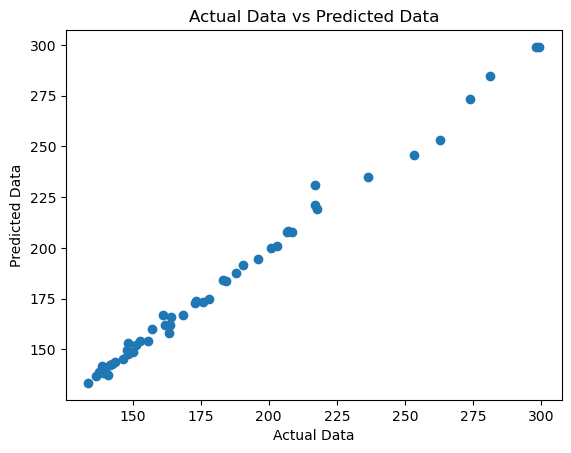

In [61]:
#visualization the actual data and predicted data

plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Actual Data vs Predicted Data")
plt.show

The r2 score is close to 100%. It means that the model predicts the target variable with good accuracy.also show in the grap Actual data and Predicted Data.
Model is build by two diffrent algro and both algro predicts the target variable with good accuracy.

